In [200]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [201]:
abalone = fetch_ucirepo(id=1) 
X = abalone.data.features
X1=X.copy()
y = abalone.data.targets
y1=y.copy()
df = pd.DataFrame(data=X)
df['target(Age)'] = y
df=df.set_index('Sex')

print("Dataset head:")
print(df.head())
print("Dataset info:")
print(df.info())

Dataset head:
     Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
Sex                                                                           
M     0.455     0.365   0.095        0.5140          0.2245          0.1010   
M     0.350     0.265   0.090        0.2255          0.0995          0.0485   
F     0.530     0.420   0.135        0.6770          0.2565          0.1415   
M     0.440     0.365   0.125        0.5160          0.2155          0.1140   
I     0.330     0.255   0.080        0.2050          0.0895          0.0395   

     Shell_weight  target(Age)  
Sex                             
M           0.150           15  
M           0.070            7  
F           0.210            9  
M           0.155           10  
I           0.055            7  
Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 4177 entries, M to M
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  

In [202]:
df=df.dropna()

## Linear Regression

In [203]:
#Train-test split
df = df.sample(frac=1, random_state=42)
ratio = 0.8
train_size = int(ratio*len(df))
df_train = df[0:train_size]
df_test = df[train_size:].copy()
print(f'training set size: {len(df_train)}')
print(f'testing set size: {len(df_test)}')

training set size: 3341
testing set size: 836


In [204]:
model = LinearRegression()
X, y = df_train.drop('target(Age)', axis=1), df_train['target(Age)']
model.fit(X, y)
print(model.intercept_, model.coef_, model.score(X,y))

2.9538346689531654 [ -1.54259354  13.73217599  10.60051242   9.07912103 -20.07785187
  -9.7096719    9.0024903 ] 0.5296653737529526


In [205]:
## forecasting using trained model
predicted_values = model.predict(df_test.drop('target(Age)', axis=1))
df_test.loc[:, 'predicted'] = predicted_values

# summarize the fit of the model
linear_mape = round(mean_absolute_percentage_error(df_test['target(Age)'], df_test['predicted']),2)
linear_mse = round(mean_squared_error(df_test['target(Age)'], df_test['predicted']),2)
linear_r2 = round(r2_score(df_test['target(Age)'], df_test['predicted']),2)

print(f'The model Mean Absolute Percentage Error: {linear_mape}')
print(f'The model Mean Squared Error: {linear_mse}')
print(f'The model r-squared: {linear_r2}')

The model Mean Absolute Percentage Error: 0.15
The model Mean Squared Error: 4.13
The model r-squared: 0.52


In [206]:
y = df_train['target(Age)']
x = df_train.drop('target(Age)', axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            target(Age)   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     536.2
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:04:39   Log-Likelihood:                -7464.2
No. Observations:                3341   AIC:                         1.494e+04
Df Residuals:                    3333   BIC:                         1.499e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9538      0.301      9.

In [209]:
# Mean Squared Error (MSE)
df_test['MSE'] = (df_test['target(Age)'] - df_test['predicted']) ** 2
df_test.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,target(Age),predicted,MSE
Sex,,,,,,,,,,
F,0.450,0.335,0.105,0.4250,0.1865,0.0910,0.1150,9,8.238814,0.579405
F,0.615,0.520,0.150,1.3435,0.6290,0.2605,0.3450,10,10.881268,0.776633
M,0.590,0.470,0.145,0.9235,0.4545,0.1730,0.2540,9,9.900945,0.811703
F,0.375,0.290,0.115,0.2705,0.0930,0.0660,0.0885,10,8.321296,2.818047
M,0.300,0.240,0.090,0.1610,0.0725,0.0390,0.0500,6,6.818367,0.669724


In [211]:
print(f'Our calculated mean squared error (mse): {df_test["MSE"].mean()}')
print(f'Earlier calculated mse by sklearn: {linear_mse}')

Our calculated mean squared error (mse): 4.128649053547352
Earlier calculated mse by sklearn: 4.13


In [35]:
# Mean Absolute Percentage Error (MAPE)
df_test['MAPE'] = abs((df_test['target(Age)'] - df_test['predicted']) / df_test['target(Age)']) * 100
df_test.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,target(Age),predicted,sq_error,MAPE
Sex,,,,,,,,,,,
F,0.695,0.550,0.185,1.6790,0.8050,0.4015,0.3965,10,10.280316,0.078577,2.803158
I,0.445,0.355,0.095,0.3615,0.1415,0.0785,0.1200,8,8.643863,0.414560,8.048288
M,0.650,0.525,0.175,1.5365,0.6865,0.3585,0.4050,11,11.370634,0.137369,3.369397
I,0.220,0.160,0.050,0.0490,0.0215,0.0100,0.0150,4,5.359526,1.848312,33.988162
M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,13.608184,1.937153,9.278776


In [37]:
print(f'Our calculated mean abolsute percentage error (MAPE): {df_test["MAPE"].mean()}')
print(f'Earlier calculated MAPE by sklearn: {linear_mape}')

Our calculated mean abolsute percentage error (MAPE): 16.90808119849875
Earlier calculated MAPE by sklearn: 0.17


In [212]:
# R^2
mean_sales = df_test['target(Age)'].mean() #Calculate the mean of 'sales'
df_test['SST'] = (df_test['target(Age)'] - mean_sales) ** 2 #Calculate SST (Total Sum of Squares)
df_test['SSR'] = (df_test['target(Age)'] - df_test['predicted']) ** 2 #Calculate SSR (Sum of Squares of Residuals)
r2 = 1 - df_test['SSR'].sum() / df_test['SST'].sum() #Calculate R-squared
df_test.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,target(Age),predicted,MSE,SST,SSR
Sex,,,,,,,,,,,,
F,0.450,0.335,0.105,0.4250,0.1865,0.0910,0.1150,9,8.238814,0.579405,0.888464,0.579405
F,0.615,0.520,0.150,1.3435,0.6290,0.2605,0.3450,10,10.881268,0.776633,0.003297,0.776633
M,0.590,0.470,0.145,0.9235,0.4545,0.1730,0.2540,9,9.900945,0.811703,0.888464,0.811703
F,0.375,0.290,0.115,0.2705,0.0930,0.0660,0.0885,10,8.321296,2.818047,0.003297,2.818047
M,0.300,0.240,0.090,0.1610,0.0725,0.0390,0.0500,6,6.818367,0.669724,15.543966,0.669724


In [39]:
print(f'Our calculated R-Squared: {r2}')
print(f'Earlier calculated R-Squared by sklearn: {linear_r2}')

Our calculated R-Squared: 0.4686594341580719
Earlier calculated R-Squared by sklearn: 0.47


Text(0.5, 0, 'Length (mm)')

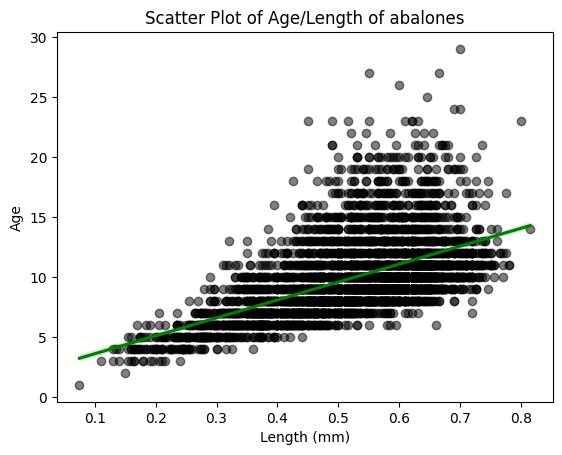

In [61]:
sns.regplot(data=df, x=df['Length'], y=df['target(Age)'],
           scatter_kws = {"color": "black", "alpha": 0.5}, line_kws = {"color": "green"}, ci = 99)
plt.title('Scatter Plot of Age/Length of abalones')
plt.ylabel("Age")
plt.xlabel("Length (mm)")

Text(0.5, 0, 'Diamter (mm)')

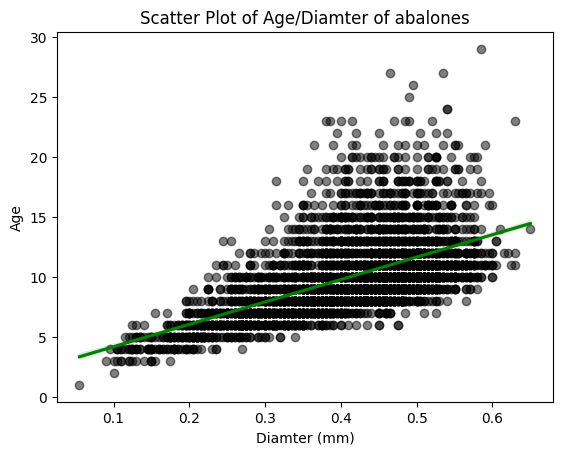

In [63]:
sns.regplot(data=df, x=df['Diameter'], y=df['target(Age)'],
           scatter_kws = {"color": "black", "alpha": 0.5}, line_kws = {"color": "green"}, ci = 99)
plt.title('Scatter Plot of Age/Diamter of abalones')
plt.ylabel("Age")
plt.xlabel("Diamter (mm)")

Text(0.5, 0, 'Length x Diameter (mm2)')

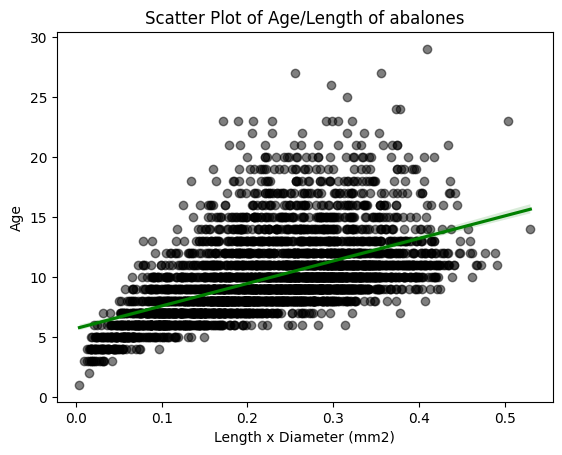

In [213]:
sns.regplot(data=df, x=df['Length']*df['Diameter'], y=df['target(Age)'],
           scatter_kws = {"color": "black", "alpha": 0.5}, line_kws = {"color": "green"}, ci = 99)
plt.title('Scatter Plot of Age/Length of abalones')
plt.ylabel("Age")
plt.xlabel("Length x Diameter (mm2)")

## Logistic Regression

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

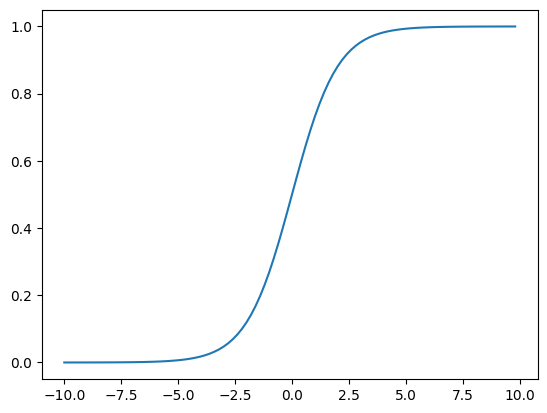

In [172]:
def sigmoid(x):
    a=[]
    for i in x:
        a.append(1/(1+np.exp(-i)))
    return(a)

x=np.arange(-10.,10.,.2)
sig=sigmoid(x)

plt.plot(x, sig)

In [182]:
X1, y1 = (df['Length']*df['Diameter']).values.reshape(-1, 1), df['target(Age)']
logReg=LogisticRegression(C=1000, max_iter=1000)
logReg.fit(X1, y1)
print(logReg.score(X1,y1))

0.26598036868565955


Text(0.5, 0, 'Length')

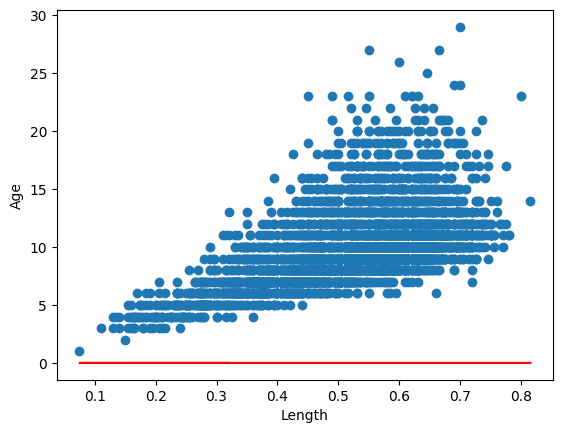

In [183]:
df1 = pd.DataFrame(data = {'Length': df['Length'].values,
                     'target(Age)': df['target(Age)'].values})

df1['logistic_preds'] = pd.DataFrame(logReg.predict_proba(X1))[1]
df1 = df1.sort_values(['logistic_preds'])

plt.scatter(df1['Length'], df1['target(Age)'])
plt.plot(df1['Length'], df1['logistic_preds'].values, color='red')

plt.ylabel('Age')
plt.xlabel('Length')


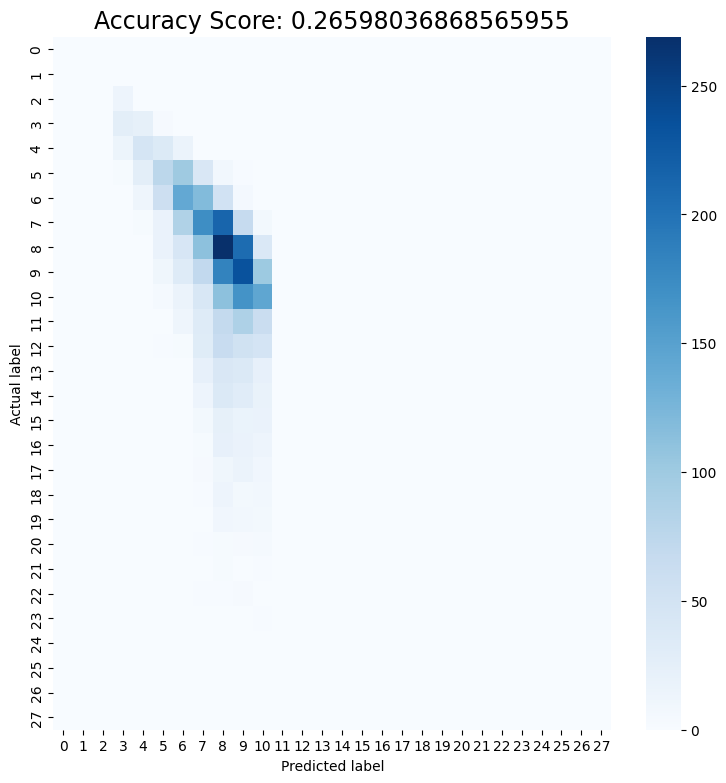

In [197]:
cm = metrics.confusion_matrix(y1, logReg.predict(X1))
plt.figure(figsize=(9,9))
sns.heatmap(cm, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {}'.format(logReg.score(X1,y1)), size = 17)
plt.tick_params()